## CSCE 676 Project Checkpoint 1: Dataset Comparison, Selection & EDA

# Section A: Identification of Candidate Datasets

**Dataset 1: 9000+ Movies : IMDb and Bechdel (Kaggle)**

https://www.kaggle.com/datasets/nliabzd/movies-imdb-and-bechdel-information

Course Topic Alignment: Anomaly Detection

Beyond Course Techniques: Causal Inference, Quantile Regression

Dataset Size: 9000+ movies with Bechdel scores

Data Types: Text (Title, Genre), Numeric (Year, Runtime, Vote Count), IMDb ID, Bechdel Test ID, Bechdel Rating, IMDb Rating

Target Variables: Revenue, IMDB Rating

Licensing: The dataset is from open-source web platforms, including IMDb and BechdelTest.com API. While the Kaggle uploader has categorized the license as "Other," the raw data is being used for non-commercial, educational research purposes.

**Dataset 2: TVTropesData ([GitHub Repo](https://github.com/dhruvilgala/tvtropes?tab=readme-ov-file))**

https://drive.google.com/file/d/1Duyz5ATlLHzwMidj15bWVnWHpdE4aRXn/view (Dataset)

Course Topic Alignment: Frequent Itemsets, Association Rules

Beyond Course Techniques: Graph Neural Networks, Community Detection

Dataset Size: Relational structure of 30,000 tropes, 1.9 million occurences across 40,000 pieces of media. Organized into mulitple CSV tables.

Data Types: Text (Trope, Title, Description), Categorical (Media Type, Genre), IDs (Trope ID, IMDb ID, Goodreads ID)

Target Variable: None

Licensing: Usage of this curated dataset requires citation of the source paper: Gala et al. (2020), "Analyzing Gender Bias within Narrative Tropes," Proceedings of the Fourth Workshop on NLP and CSS. The raw content is sourced from TVTropes.org, which is licensed under CC BY-NC-SA 3.0.

**Dataset 3: Wikipedia Movie Plots**

https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots

Course Topic Alignment: Text Mining (Sentiment Analysis)

Beyond Course Techniques: Dynamic Time Warping

Dataset Size: ~35,000 movies

Data Types: Text (Title, Plot, Director, Cast), Numeric (Year), Categorical (Origin, Genre)

Target Variable: Sentiment Polarity [-1,1]

Licensing: CC BY-SA 4.0



# Section B: Comparative Analysis of Datasets

| Dimension | Dataset 1 | Dataset 2 | Dataset 3 |
|---|---|---|---|
| Supported Data Mining Tasks | Course: Anomaly Detection <br> External: Causal Inference, Quantile Regression| Course: Frequent Itemsets Association Rules <br> External: Graph Neural Networks, Community Detection | Course: Text Mining (Sentiment Analysis) <br> External: Dynamic Time Warping |
| Data Quality Issues | ~18% of movies are missing 2nd genre, <br> ~40% of movies are missing 3rd genre | Some inconsistency with trope labels <br> (duplicate tropes worded differently), <br> graph sparsity (many tropes only have few examples) | Noisy text (some plots are very detailed, <br> others are high-level), missing data (for old, obscure films) |
| Algorithmic Feasibility | High (~9k rows can be easily handled) | Medium (~1.9M occurences may need NetworkX) | Medium (Dynamic Time Warping is O(N^2)) |
| Bias Considerations | Confirmation bias (Users may favor <br> reporting movies likely to pass the Bechdel Test) | Popularity bias (Popular movies have more tropes <br> associated than older/indie films) | Cultural bias (Dataset skews toward Hollywood/English films, <br> unrepresenting other productions) |
| Ethical Considerations | Might influence screenwriters to performatively <br> include details that allow their film to pass the Bechdel <br> Test for winning public favor/revenue rather than <br> focusing on authenticity | Relying on crowdsourced data, which is inherently biased, <br> might amplify stereotypes associated with tropes in media | Data skewed toward English movies might lead <br> to unnecessary generalizations about non-Western <br> ones due to lack of examples |


# Section C: Dataset Selection

**Dataset 1: 9000+ Movies : IMDb and Bechdel (Kaggle)**

Reasons:

- Dataset is tabular and well-structured, easy to preprocess
- Can compare social impact vs. financial success/failure
- Directly supports anomaly detection (course)
- Supports causal inference and quantile regression not covered in class (external)

Trade Offs:

- Dataset is heavily weighted toward newer films (post-1985), older films may be labeled as outliers due to lack of data points
- Contains less data compared to other two datasets

# Section D: Exploratory Data Analysis (Selected Dataset Only)

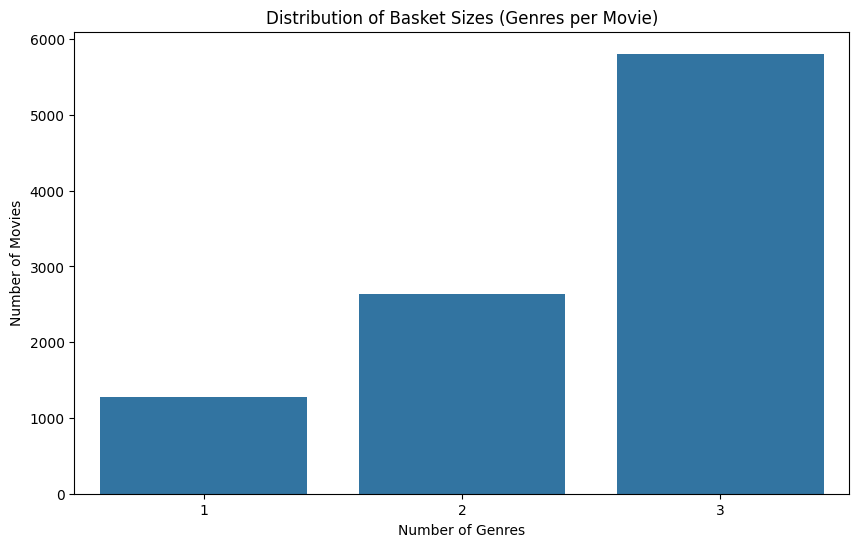



Total number of unique genres: 25


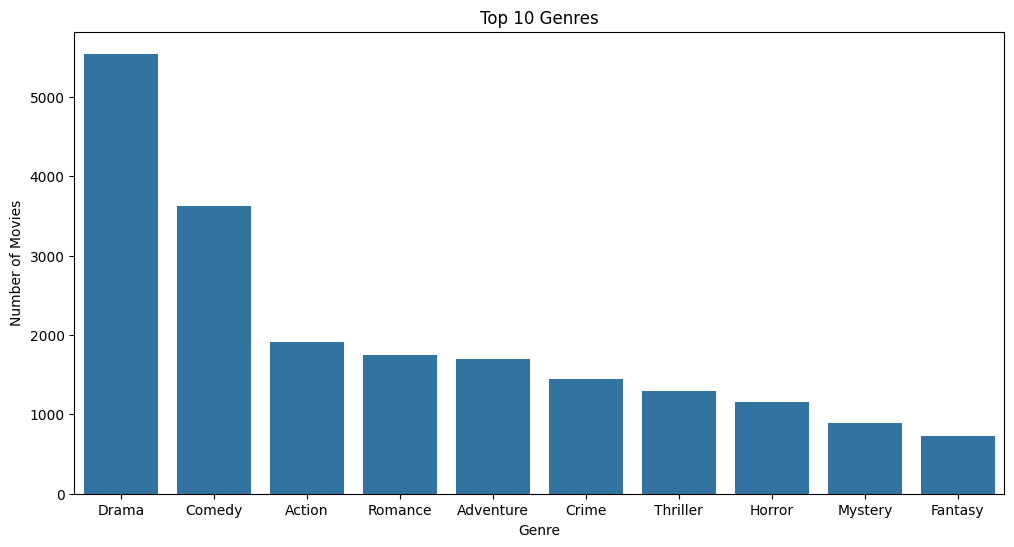

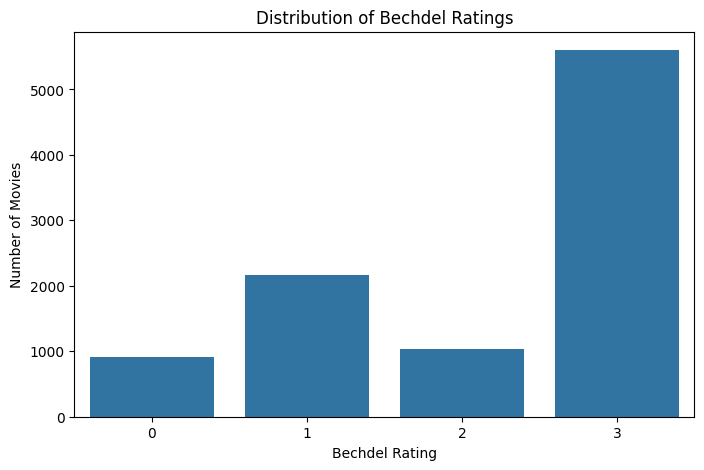

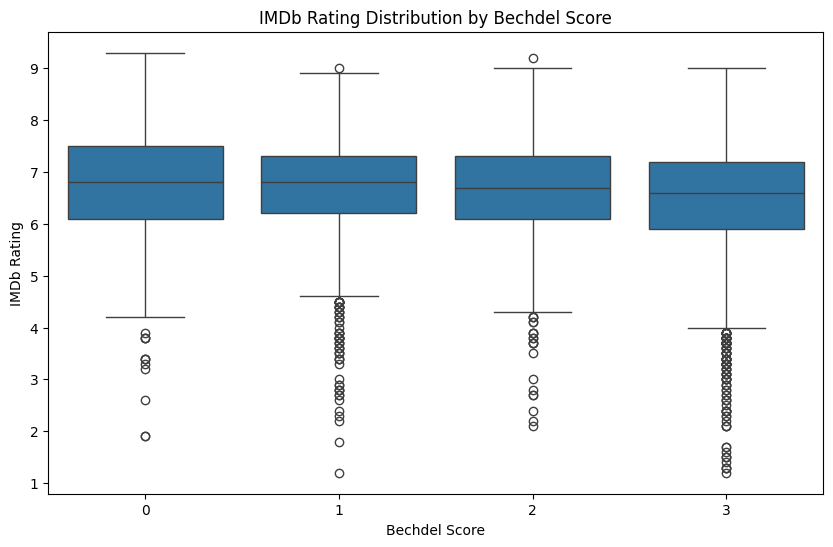



Missing Values per Column:
genre2    1272
genre3    3911
dtype: int64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset into DataFrame
df = pd.read_csv('/Bechdel_IMDB_Merge0524.csv')

# Distribution of Basket Sizes (Genres per Movie)
df['genre_count'] = df[['genre1', 'genre2', 'genre3']].notna().sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='genre_count', data=df)
plt.title('Distribution of Basket Sizes (Genres per Movie)')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.show()
print("\n")

# Frequency of Top Genres
all_genres = pd.concat([df['genre1'], df['genre2'], df['genre3']])
genre_counts = all_genres.value_counts()
print("Total number of unique genres:", len(genre_counts))
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()
print("\n")

# Frequence of Bechdel Scores
# 0 - Fails to meet any criteria
# 1 - Two women are present, but do not talk to each other
# 2 - Two women talk, but only about men
# 3 - All criteria met
plt.figure(figsize=(8, 5))
sns.countplot(x='bechdelRating', data=df)
plt.title('Distribution of Bechdel Ratings')
plt.xlabel('Bechdel Rating')
plt.ylabel('Number of Movies')
plt.show()
print("\n")

# IMDb Rating vs. Bechdel Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='bechdelRating', y='imdbAverageRating', data=df)
plt.title('IMDb Rating Distribution by Bechdel Score')
plt.xlabel('Bechdel Score')
plt.ylabel('IMDb Rating')
plt.show()
print("\n")

# Missing Data Check
missing_data = df.isnull().sum()
print("Missing Values per Column:")
print(missing_data[missing_data > 0])

**Initial Observations**

- The majority of the films in the dataset have three genres, with fewer films having only one or two. Good for association rule mining.
- The genre distribution reveals that Drama and Comedy are most dominant, while there's a sharp drop-off for Action, Romance and Adventure. Drama is likely to be a common antecedent in rule mining.
- The distribution of Bechdel Ratings suggests that there may be a reporting bias as many films have a score of 3.
- The boxplot indicates a slight inverse relationship between IMDb Rating vs Bechdel Score. Movies with a Bechdel Score of 3 have a lower median IMDb rating compared to those with a score of 0.
- The missing values show that roughly 40% of the dataset has incomplete fields for genre2 and genre3.

# Section E: Initial Insights and Direction

Observation 1: There's a slight dip in median IMDb ratings for movies that completely pass (score of 3) the Bechdel Test compared to those who fail (score of 0).

Hypothesis: This may suggest that there's an internal bias against female-led films or that Action movies tend to have high ratings but low Bechdel scores.

Potential RQs: Does passing the Bechdel Test have a negative correlation with user movie ratings depending on genre? Does passing the Bechdel Test help a lower performing movie while hurting a blockbuster?

---

Observation 2: Drama and Comedy outnumber others, but many films have three different genres associated with them.

Hypothesis: Association rules may be dependent on Drama films. Normalizing or filtering the data might help in finding niche combinations.

Potential RQs: Are there genre combinations that are more likely to fail the Bechdel Test?

---

Observation 3: A significant number of movies pass the Bechdel Test completely.

Hypothesis: There are enough positive examples to perform Causal Inference and check whether these films drive revenue.

Potential RQs: Does passing the Bechdel Test have a causal effect on a film's revenue?


# Section F: GitHub Portfolio Building

https://github.com/YeshuLokesh8/csce676_project

On my honor, I declare the following resources:
1. Collaborators:
- NA

2. Web Sources:
- Bechdel Test Movie List https://bechdeltest.com/
- Analyzing Gender Bias in Narrative Tropes Repo https://github.com/dhruvilgala/tvtropes?tab=readme-ov-file
- TVTropesData https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1Duyz5ATlLHzwMidj15bWVnWHpdE4aRXn%2Fview

3. AI Tools:
- Google Colab code autocomplete
- Gemini: Used to write code for performing EDA on selected dataset

4. Citations:
- 9000+ Movies : IMDb and Bechdel https://www.kaggle.com/datasets/nliabzd/movies-imdb-and-bechdel-information
- Analyzing Gender Bias in Narrative Tropes [Analyzing Gender Bias within Narrative Tropes](https://aclanthology.org/2020.nlpcss-1.23/) (Gala et al., NLP+CSS 2020)
- Wikipedia Movie Plots https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots
